## [Enzo LOUIS]
## [RECHERCHE PERSONNAGE] Étude des mots caractéristiques et fréquents
**Objectif : montrer les thèmes principales, les passions, (personnage secondaire préféré)**

**Objectif : montrer les thèmes auquel ils font face dans les saisons les plus importantes (en terme de répliques, mentions, émotions)**

**Objectif : observer que les mots fréquents sont plus ou moins les mêmes pour tout le monde, des expressions américaines classiques**

#### Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
import re

# dataframe principales avec tous les dialogues
df = pd.read_csv("../Analyse_Sentiments/friends_dialogues_final.csv", encoding='utf-8')

def show_graphic(results, title, xlabel, ylabel, folder, filename):
    words, counts = zip(*results)
    plt.bar(words, counts, color='skyblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{folder}/{filename}.png")
    plt.show()

characters = ['Chandler', 'Joey', 'Ross', 'Rachel', 'Phoebe', 'Monica']
PATH = "../../src/main/resources/les_png/recherche_personnage/"

#### MOTS CARACTERISTIQUES GLOBALES

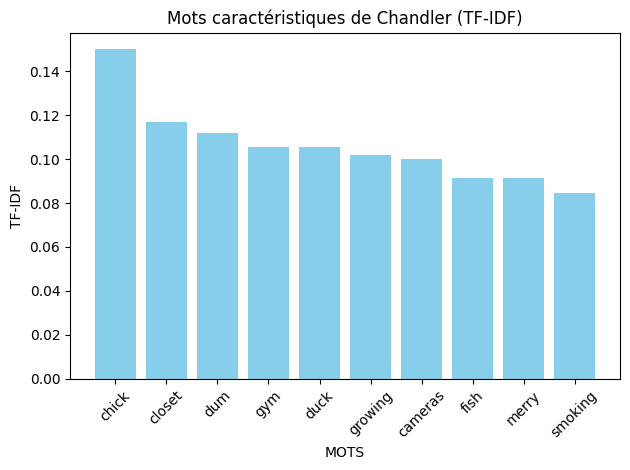

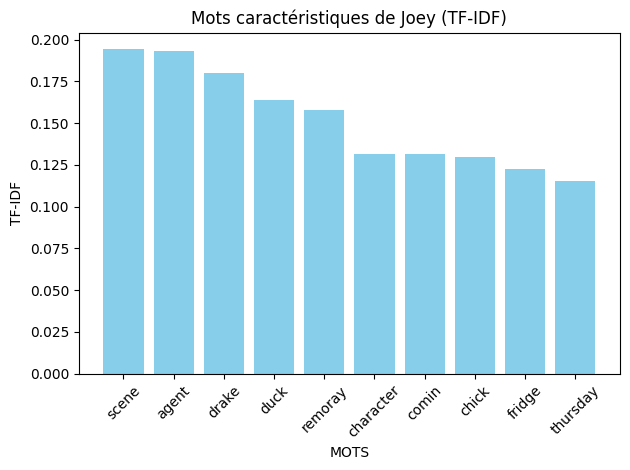

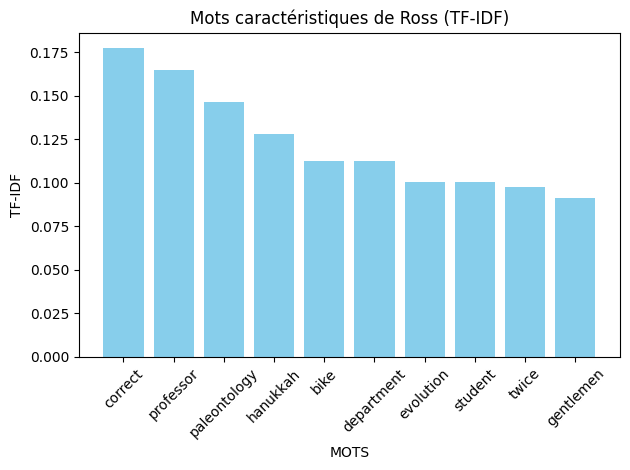

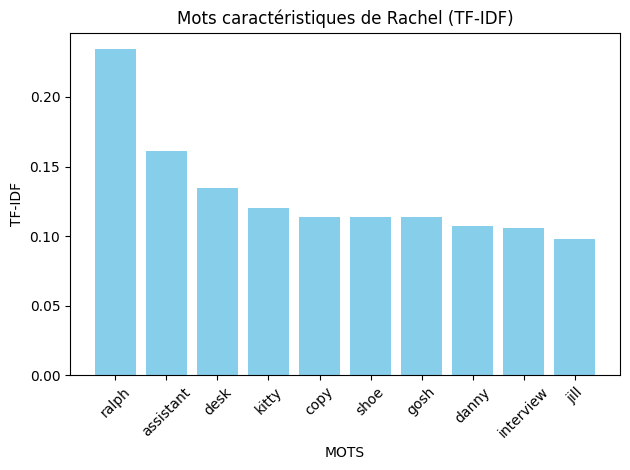

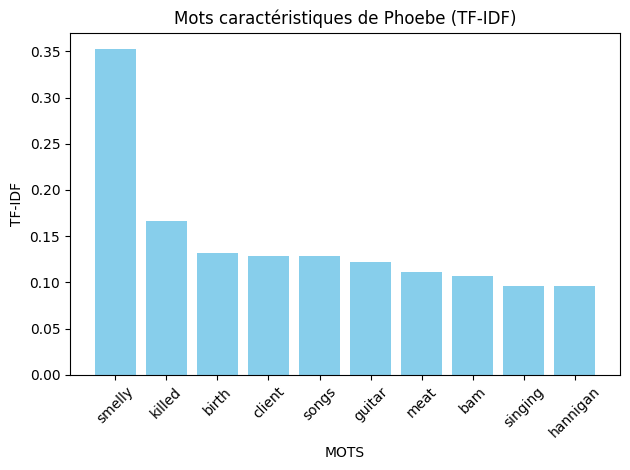

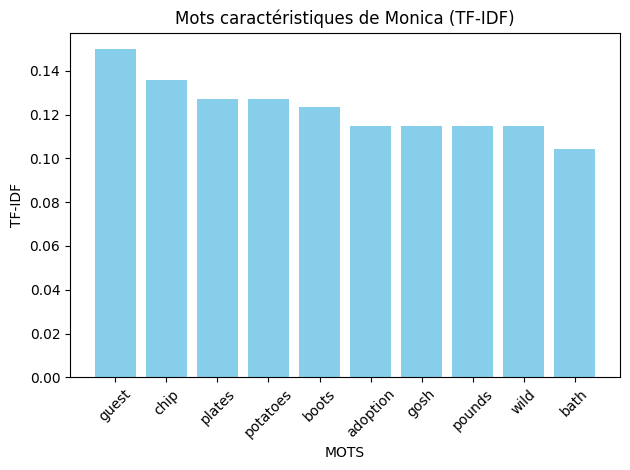

In [18]:
df_mot_important = pd.read_csv("top_10_mots_important_par_personnage_et_saison.csv", encoding='utf-8')

for i, row in df_mot_important.iterrows():
    char = row["character"]
    season = row["season"]
    if season == "ALL":
        mots = [row[f"mot_{j}_filtre"] for j in range(1, 11)]
        scores = [row[f"score_{j}_filtre"] for j in range(1, 11)]
        results = list(zip(mots, scores))
        show_graphic(results, "Mots caractéristiques de " + char + " (TF-IDF)", "MOTS", "TF-IDF", f"{PATH}/mot_important_personnage_saison_importante", f"{char.lower()}_all")

### MOT CARACTERISTIQUE SAISON X

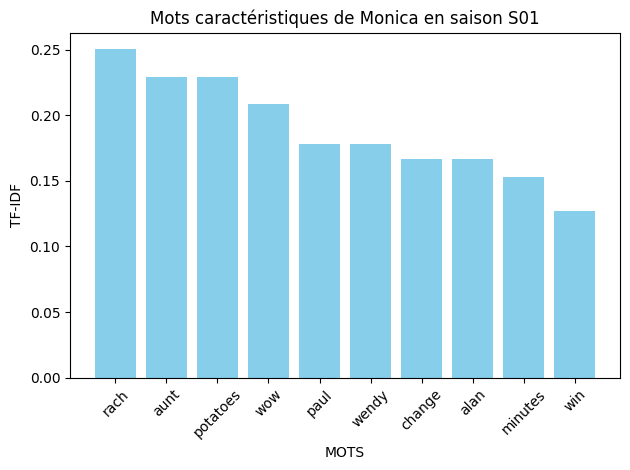

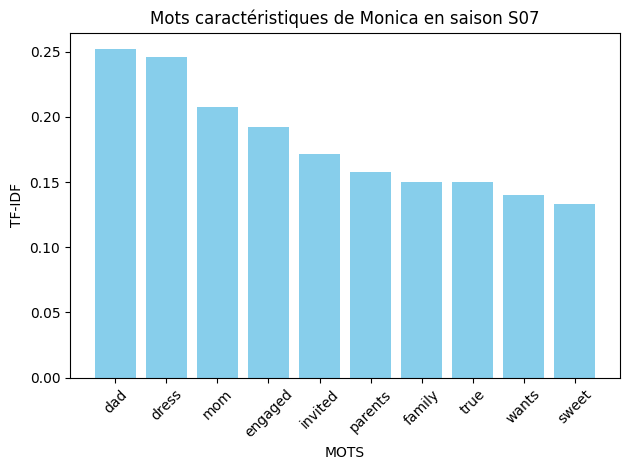

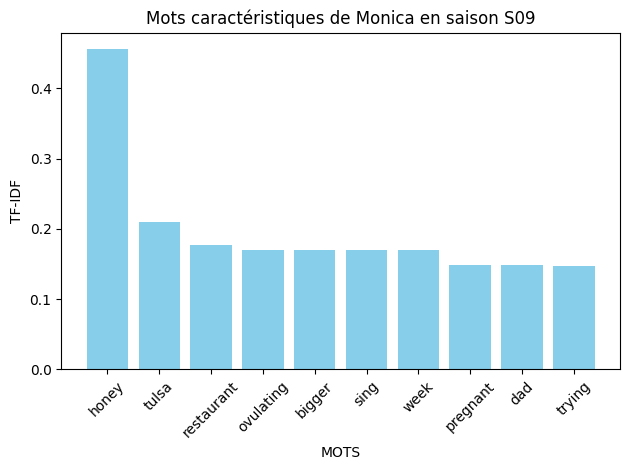

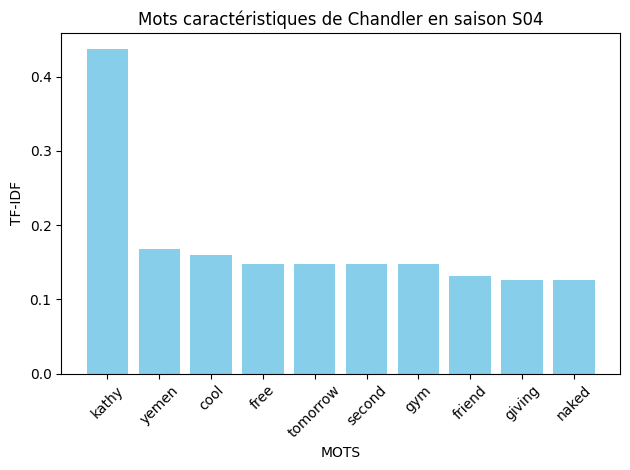

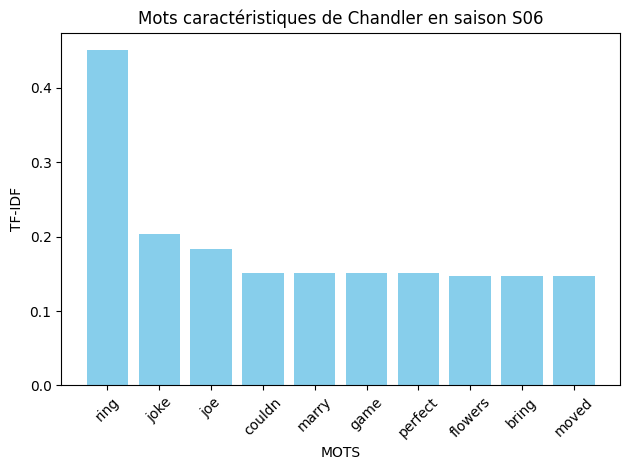

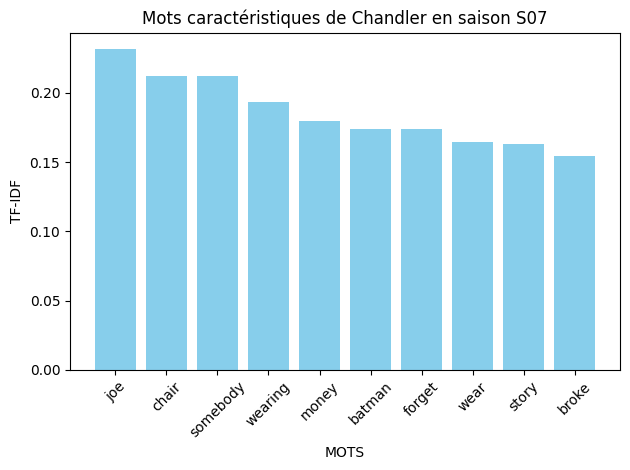

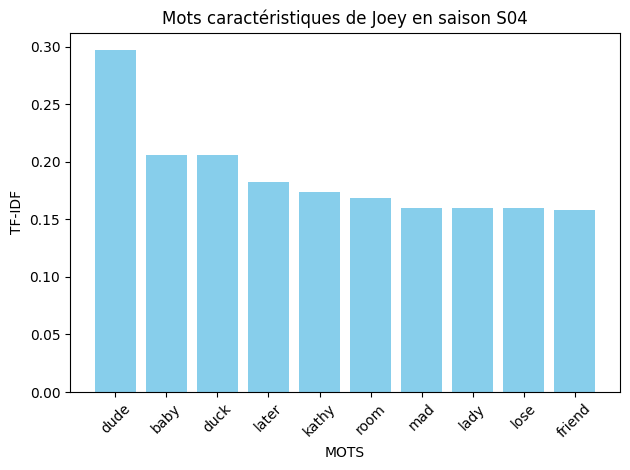

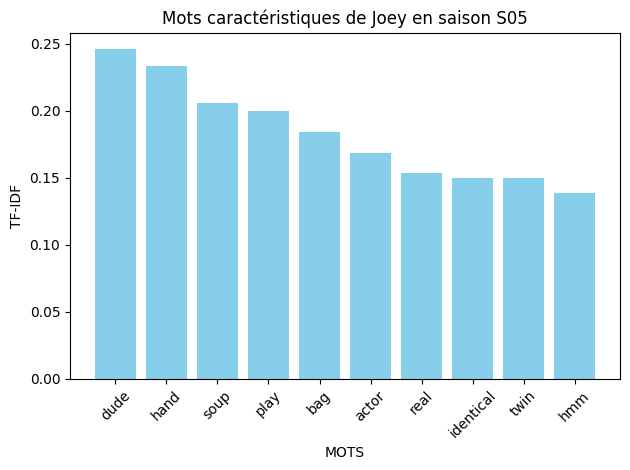

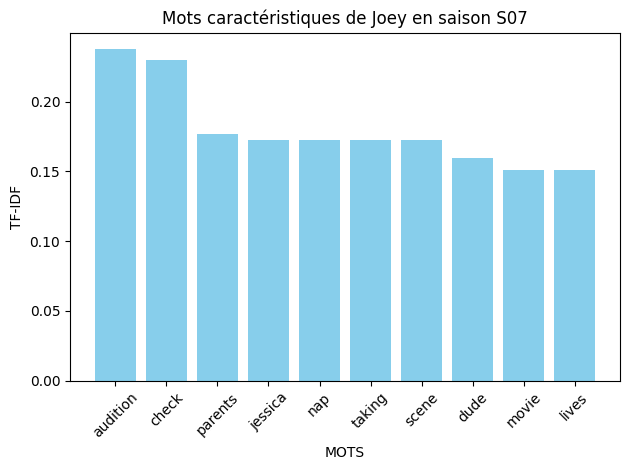

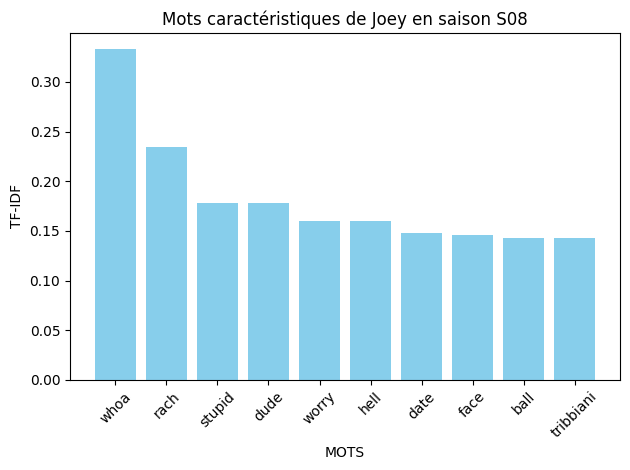

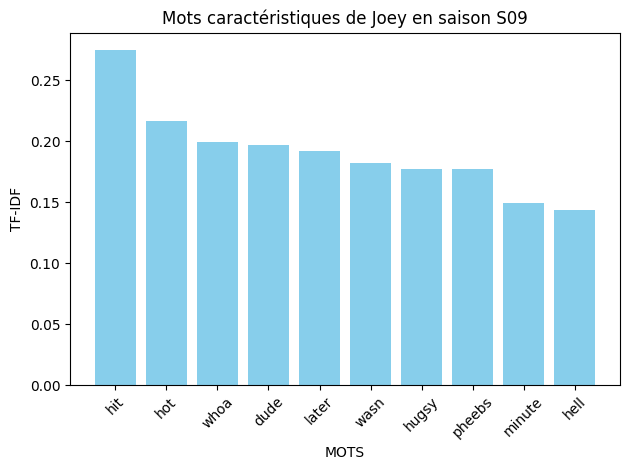

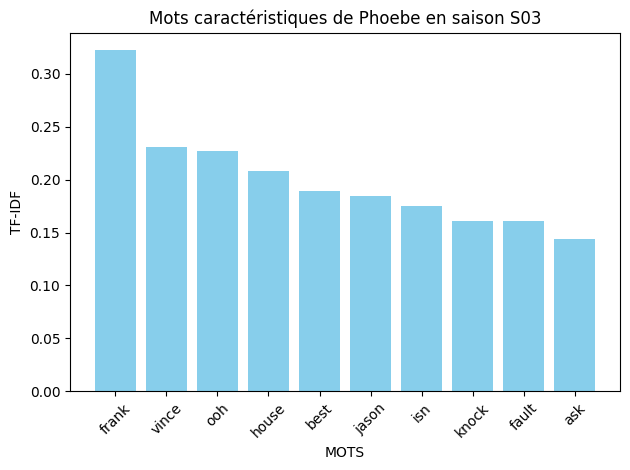

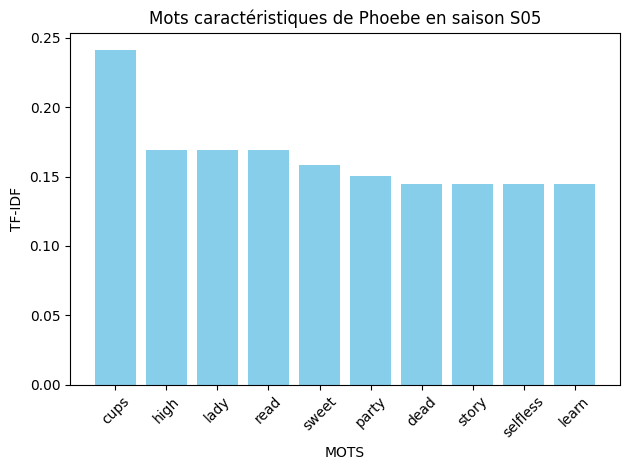

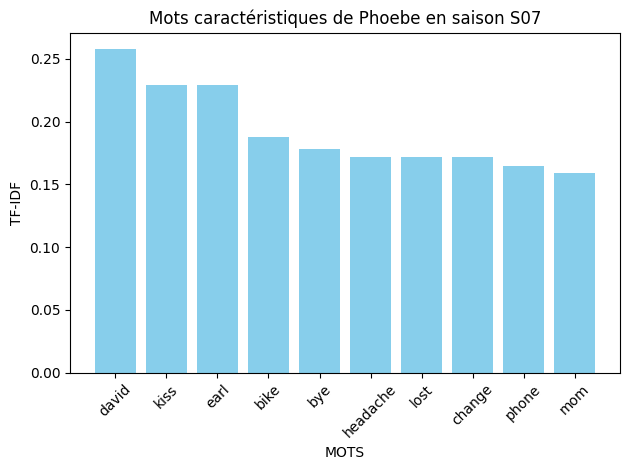

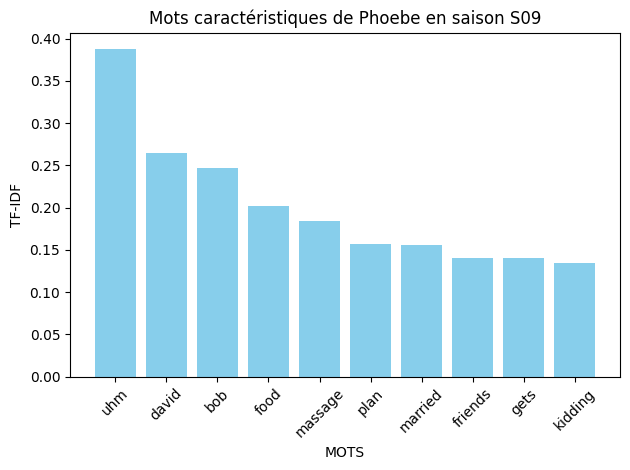

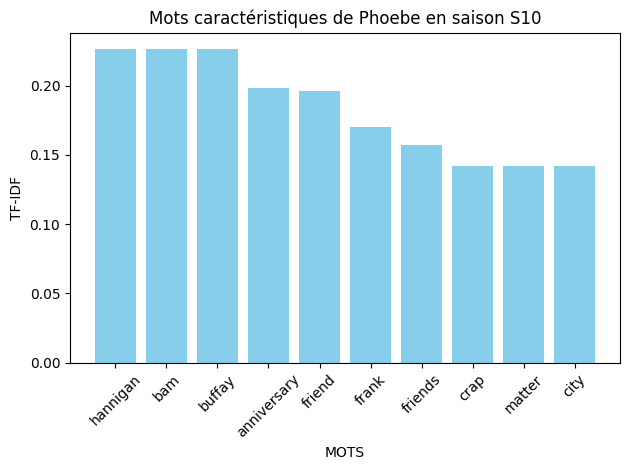

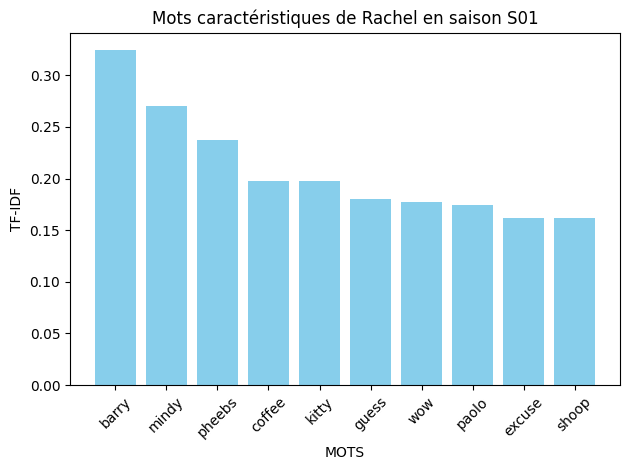

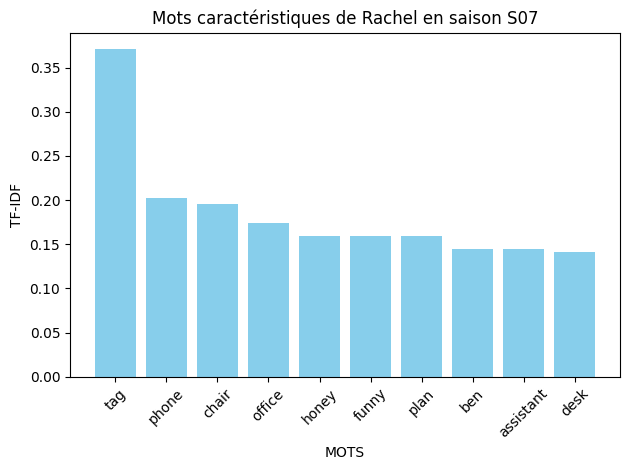

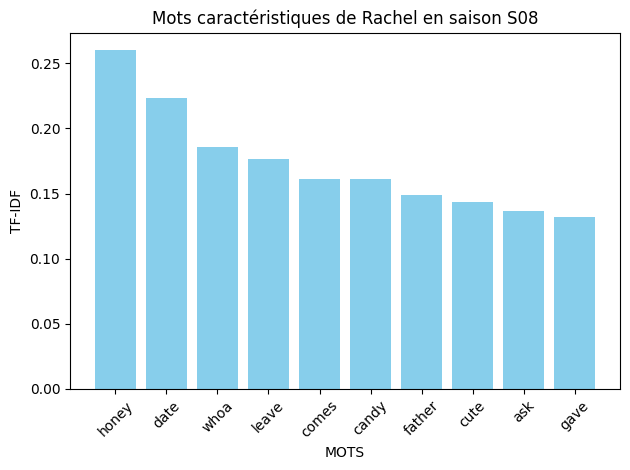

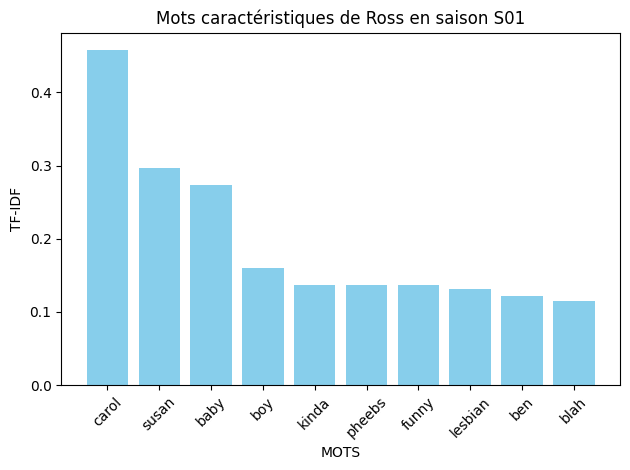

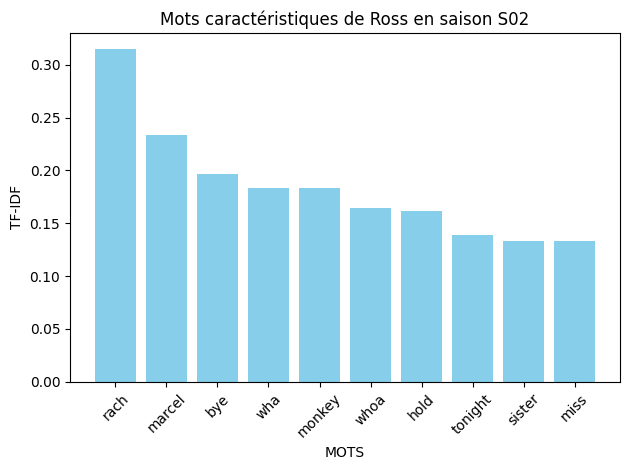

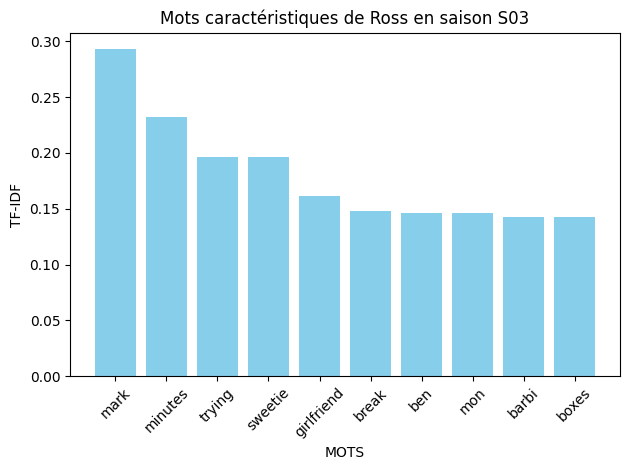

In [ ]:
df_mot_important = pd.read_csv("top_10_mots_important_par_personnage_et_saison.csv", encoding='utf-8')

def generate_graphics(season_selection, character):
    for i, row in df_mot_important.iterrows():
        char = row["character"]
        season = row["season"]
        if season == season_selection and char == character:
            mots = [row[f"mot_{j}"] for j in range(1, 11)]
            scores = [row[f"score_{j}"] for j in range(1, 11)]
            results = list(zip(mots, scores))
            show_graphic(results, f"Mots caractéristiques de {char} en saison {season}", "MOTS", "TF-IDF", f"{PATH}/mot_important_personnage_saison_importante", f"{char.lower()}_saison_{season}")

usefull_graphics = {
    "Monica": ["S01", "S07", "S09"],
    "Chandler": ["S04", "S06", "S07"],
    "Joey": ["S04", "S05", "S07", "S08", "S09"],
    "Phoebe": ["S03", "S05", "S07", "S09", "S10"],
    "Rachel": ["S01", "S07", "S08"],
    "Ross": ["S01", "S02", "S03"]
}
for character, seasons in usefull_graphics.items():
    for season in seasons:
        generate_graphics(season, character)

### La joie revient énormément comme sentiments dans la série (observé dans l'analyse sentiments), quels sont les domaines dans l'intrigue de chaque personnages, qui les rend heureux ? (pas les mots les plus heureux, l'histoire)

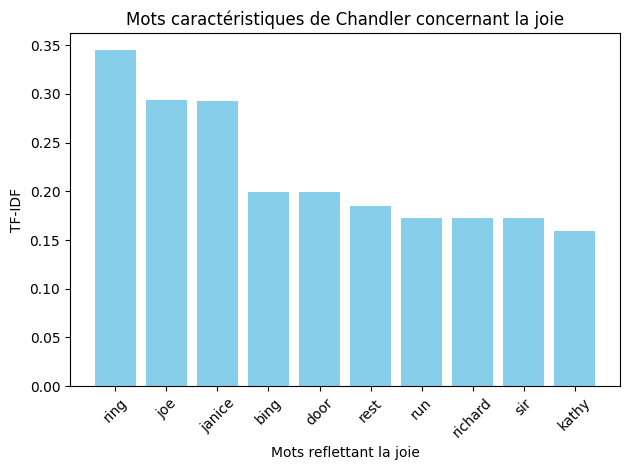

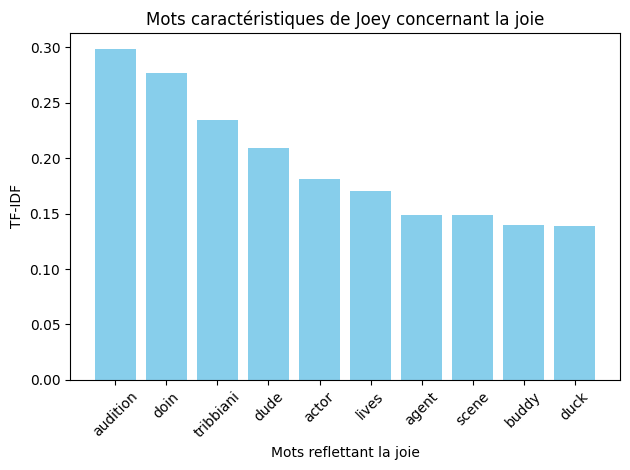

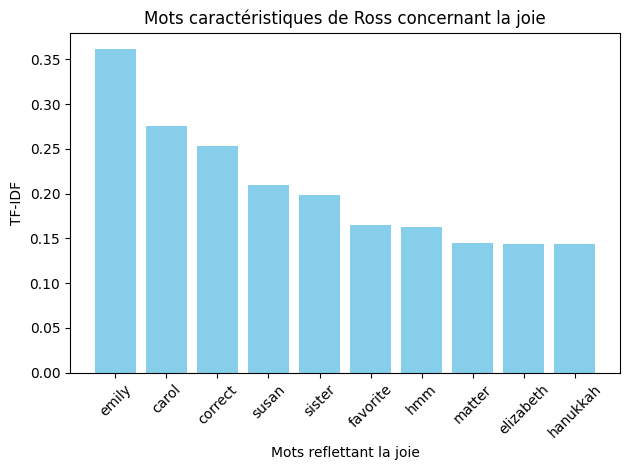

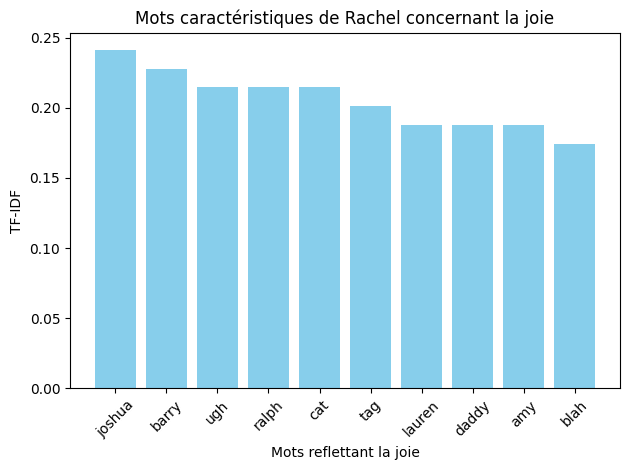

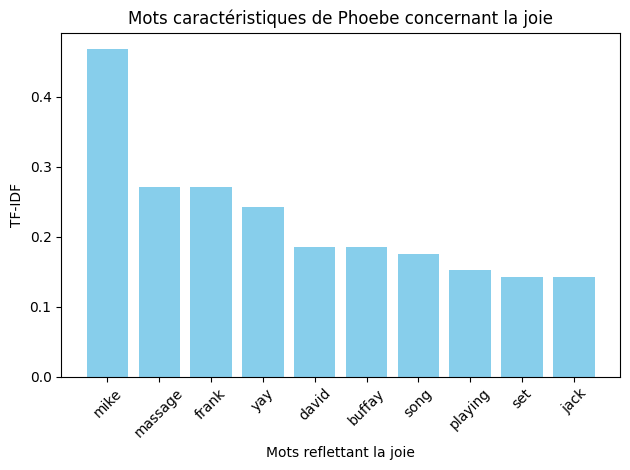

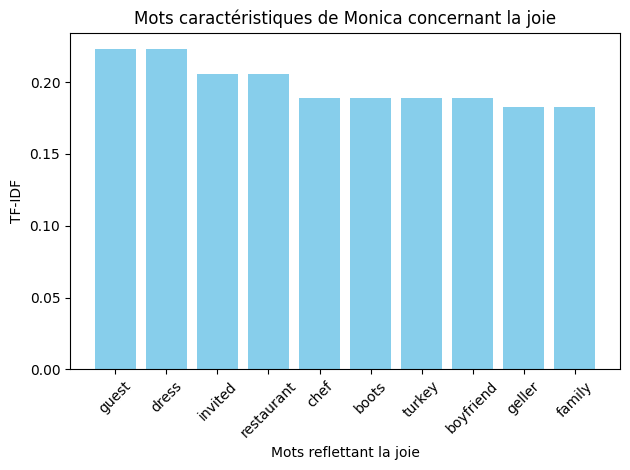

In [17]:
df_joy = pd.read_csv("top_10_mots_important_par_personnage_et_saison_joy.csv", encoding='utf-8')

for i, row in df_joy.iterrows():
    char = row["character"]
    season = row["season"]
    if season == "ALL":
        mots = [row[f"mot_{j}"] for j in range(1, 11)]
        scores = [row[f"score_{j}"] for j in range(1, 11)]
        results = list(zip(mots, scores))
        show_graphic(results, "Mots caractéristiques de " + char + " concernant la joie", "Mots reflettant la joie", "TF-IDF", f"{PATH}/mot_important_personnage_saison_importante_joy", f"{char.lower()}_all")

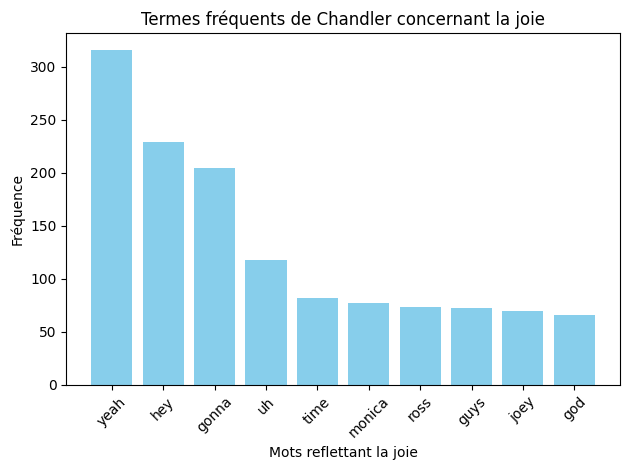

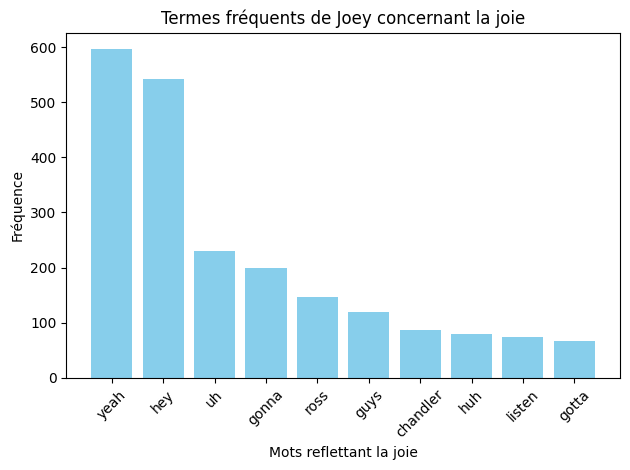

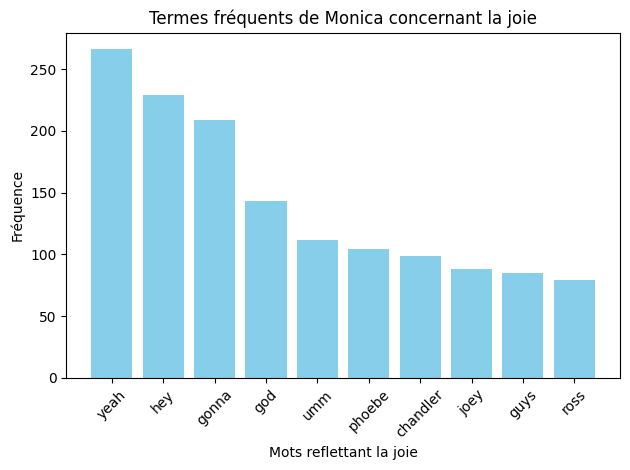

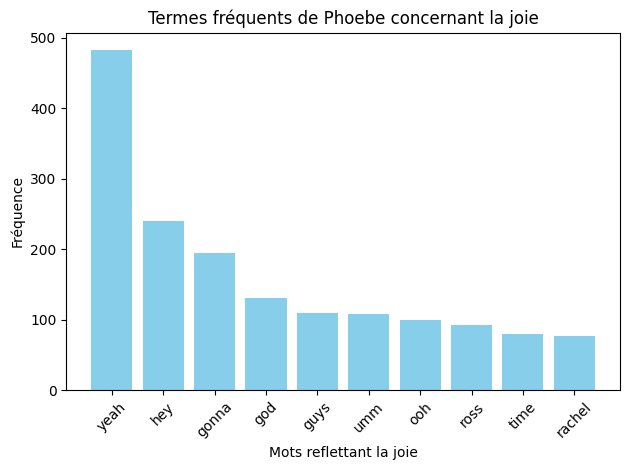

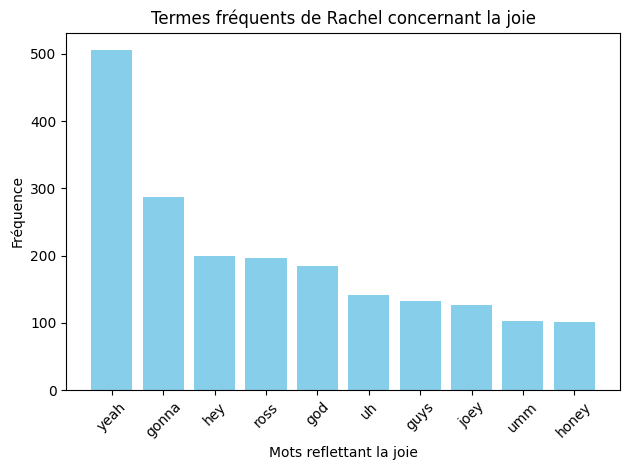

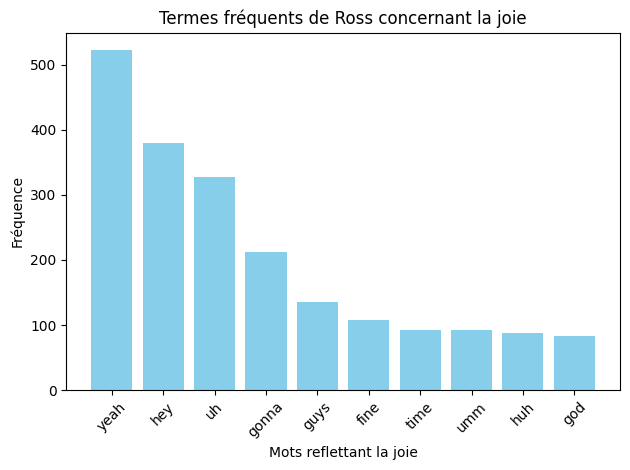

In [15]:
df_joy = pd.read_csv("top_10_mots_par_personnage_et_saison_joy.csv", encoding='utf-8')

for i, row in df_joy.iterrows():
    char = row["character"]
    season = row["season"]
    if season == "ALL":
        mots = [row[f"mot_{j}"] for j in range(1, 11)]
        scores = [row[f"freq_{j}"] for j in range(1, 11)]
        results = list(zip(mots, scores))
        show_graphic(results, "Termes fréquents de " + char + " concernant la joie", "Mots reflettant la joie", "Fréquence", f"{PATH}/mot_important_personnage_saison_importante_joy", f"{char.lower()}_frequence_all")

##### Autres - Pré-analyse rapide richesse de vocabulaire

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

characters = ['Chandler', 'Joey', 'Ross', 'Rachel', 'Phoebe', 'Monica']

char_docs = []
for char in characters:
    lines = df[df['character'] == char]['line'].astype(str)
    full_text = " ".join(lines)
    char_docs.append(full_text)

# personnage = un document
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(char_docs)
words = vectorizer.get_feature_names_out()

# tf-idf moyen persos
tfidf_means = {}
for i, char in enumerate(characters):
    row = X[i].toarray().flatten()
    mean_score = row.mean()
    tfidf_means[char] = mean_score

print(tfidf_means)

{'Chandler': np.float64(0.001261428557976972), 'Joey': np.float64(0.0011336973049717925), 'Ross': np.float64(0.0011729850411648052), 'Rachel': np.float64(0.0009683600277194713), 'Phoebe': np.float64(0.0010593181024178275), 'Monica': np.float64(0.0011676743410541175)}


#### [SEMBLE UTILE] IDF-TF global (documents=Episode) VS IDF-TF personnages

In [8]:
def clean_line(line):
    """
    Enlève les annotations/didascalies, les ensemble de mots entre parenthèses
    Mets en minuscule
    Enlève les caractères spéciaux
    :param line: réplique de dialogue
    :return: 
    """
    line = re.sub(r'\([^)]*\)', '', line)
    
    # Supprimer les mots avec majuscules (type "Joey", "Monica", etc.)
    # line = ' '.join([word for word in line.split() if not word[0].isupper()])
    
    # lower + clean special char + split
    line = re.sub(r'[^\w\s]', ' ', line.lower())
    return re.sub(r'\s+', ' ', line).strip()  #.split()

with open("advanced_stopwords.txt") as stopwords:
    stopwords_set = set(stopwords.read().split("\n"))

"""
custom_stopwords = []
# advanced stopwords + stopwords personalisé
full_stopwords = list(stopwords_set.union(custom_stopwords))
"""


'\ncustom_stopwords = []\n# advanced stopwords + stopwords personalisé\nfull_stopwords = list(stopwords_set.union(custom_stopwords))\n'

In [ ]:
# IDF-TF global (documents=Episode) et IDF-TF personnage et comparaison

# --- 1. TF-IDF global (documents = répliques) ---

documents = df['line'].astype(str).tolist()

df['episode_id'] = df['season'].astype(str)# + '_' + df['episode'].astype(str)
episodes = df.groupby('episode_id')['line'].apply(lambda lines: ' '.join(lines)).reset_index()
episodes['line'] = [clean_line(line) for line in episodes['line']]
stopwords_set = ['paolo', 'erica', 'bonnie', 'amanda', 'chloe', 'tim', 'brian', 'susie', 'tailor', 'alex', 'isabella', ]
stopwords_set = list(set(ENGLISH_STOP_WORDS).union(stopwords_set))

vectorizer_global = TfidfVectorizer(stop_words=stopwords_set, min_df=2, max_df=0.2, token_pattern=r"(?u)\b\w\w\w+\b")

X_global = vectorizer_global.fit_transform(episodes['line'])
mean_tfidf_global = X_global.mean(axis=0).A1
words_global = vectorizer_global.get_feature_names_out()

# Top 10 mots TF-IDF globaux
top_indices_global = mean_tfidf_global.argsort()[::-1][:10]
top_global_words = [words_global[i] for i in top_indices_global]

print("🔹 Top 10 mots TF-IDF globaux :")
print(", ".join(top_global_words))
print("\n")

# --- 2. TF-IDF par personnage (documents = 1 par personnage), avec vocabulaire global ---

# Construire un document par personnage
char_docs = []
for char in characters:
    lines = df[df['character'] == char]['line'].astype(str)
    full_text = " ".join(lines)
    full_text = clean_line(full_text)
    char_docs.append(full_text)


# Reutiliser le vocabulaire du global
vectorizer_persona = TfidfVectorizer(max_df=0.8, min_df=2, vocabulary=vectorizer_global.vocabulary_, stop_words=stopwords_set, token_pattern=r"(?u)\b\w\w+\b")

X_persona = vectorizer_persona.fit_transform(char_docs)
words_persona = vectorizer_persona.get_feature_names_out()

# --- 3. Comparaison : top perso vs top global ---

print("🔍 Comparaison entre mots TF-IDF globaux et ceux des personnages :\n")

for i, char in enumerate(characters):
    row = X_persona[i].toarray().flatten()
    top_indices_persona = row.argsort()[::-1][:10]
    top_persona_words = [words_persona[j] for j in top_indices_persona]

    print(top_persona_words)

    # Mots communs entre top global et top perso
    common_words = [w for w in top_global_words if w in top_persona_words]

    print(f"{char}: {len(common_words)} mot(s) en commun ({', '.join(common_words)})")
    print()


#### IDF-TF global (documents=Réplique) VS IDF-TF personnages (peu utile => oh, yeah... dans les 2 cas)

In [ ]:
# IDF-TF global (documents=Réplique) et IDF-TF personnage et comparaison

# --- 1. TF-IDF global (documents = répliques) ---

documents = df['line'].astype(str).tolist()

vectorizer_global = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.2, token_pattern=r"(?u)\b\w\w+\b")

X_global = vectorizer_global.fit_transform(documents)
mean_tfidf_global = X_global.mean(axis=0).A1
words_global = vectorizer_global.get_feature_names_out()

# Top 10 mots TF-IDF globaux
top_indices_global = mean_tfidf_global.argsort()[::-1][:10]
top_global_words = [words_global[i] for i in top_indices_global]
top_global_result = [(words_global[i], mean_tfidf_global[i]) for i in top_indices_global]

print("🔹 Top 10 mots TF-IDF globaux :")
print(", ".join(top_global_words))
print("\n")

print("Global")
for word, score in top_global_result:
    print(f"{word}: {score:.3f}", end=" ")
print("--")

# --- 2. TF-IDF par personnage (documents = 1 par personnage), avec vocabulaire global ---

# Construire un document par personnage
char_docs = []
for char in characters:
    lines = df[df['character'] == char]['line'].astype(str)
    full_text = " ".join(lines)
    char_docs.append(full_text)

# Reutiliser le vocabulaire du global
vectorizer_persona = TfidfVectorizer(stop_words="english", token_pattern=r"(?u)\b\w\w+\b")

X_persona = vectorizer_persona.fit_transform(char_docs)
words_persona = vectorizer_persona.get_feature_names_out()

# --- 3. Comparaison : top perso vs top global ---

print("🔍 Comparaison entre mots TF-IDF globaux et ceux des personnages :\n")

for i, char in enumerate(characters):
    row = X_persona[i].toarray().flatten()
    top_indices_persona = row.argsort()[::-1][:10]

    print(char, end="(")
    for idx in top_indices_persona:
        word = words_persona[idx]
        score = row[idx]
        print(f"  {word}: {score:.3f}", end=", ")
    
    print(")")

    top_persona_words = [words_persona[j] for j in top_indices_persona]

    # Mots communs entre top global et top perso
    common_words = [w for w in top_global_words if w in top_persona_words]

    print(f"{char}: {len(common_words)} mot(s) en commun ({', '.join(common_words)})")
    print()


🔹 Top 10 mots TF-IDF globaux :
oh, yeah, hey, know, okay, just, don, right, really, gonna


Global
oh: 0.037 yeah: 0.033 hey: 0.030 know: 0.027 okay: 0.027 just: 0.019 don: 0.019 right: 0.018 really: 0.015 gonna: 0.013 --
🔍 Comparaison entre mots TF-IDF globaux et ceux des personnages :

Chandler(  know: 0.363,   oh: 0.310,   okay: 0.271,   just: 0.261,   don: 0.231,   yeah: 0.209,   hey: 0.195,   right: 0.184,   joey: 0.167,   like: 0.160, )
Chandler: 8 mot(s) en commun (oh, yeah, hey, know, okay, just, don, right)

Joey(  hey: 0.356,   yeah: 0.318,   know: 0.314,   oh: 0.291,   right: 0.222,   just: 0.217,   don: 0.200,   like: 0.187,   okay: 0.182,   uh: 0.167, )
Joey: 8 mot(s) en commun (oh, yeah, hey, know, okay, just, don, right)

Ross(  know: 0.336,   oh: 0.307,   just: 0.274,   okay: 0.268,   yeah: 0.265,   uh: 0.240,   hey: 0.239,   don: 0.212,   right: 0.164,   like: 0.150, )
Ross: 8 mot(s) en commun (oh, yeah, hey, know, okay, just, don, right)

Rachel(  oh: 0.514,   know: 0

#### [INUTILE] TF-IDF global (documents=Répliques) VS MOTS CARACTERISTIQUES

In [12]:
# Liste des personnages à analyser
characters = ['Chandler', 'Joey', 'Ross', 'Rachel', 'Phoebe', 'Monica']

# --- 1. TF-IDF global (documents = répliques) ---

documents = df['line'].astype(str).tolist()

vectorizer_global = TfidfVectorizer(
    stop_words='english',
    min_df=5,
    max_df=0.8
)
X_global = vectorizer_global.fit_transform(documents)
mean_tfidf_global = X_global.mean(axis=0).A1
words_global = vectorizer_global.get_feature_names_out()

top_indices_global = mean_tfidf_global.argsort()[::-1][:10]
top_global_words = [words_global[i] for i in top_indices_global]

print("Top 10 mots TF-IDF globaux :")
for w in top_global_words:
    print(w)

# --- 2. TF-IDF par personnage (documents = personnages) ---

char_docs = []
for char in characters:
    lines = df[df['character'] == char]['line'].astype(str)
    full_text = " ".join(lines)
    char_docs.append(full_text)

vectorizer_persona = TfidfVectorizer(max_df=0.8, min_df=2,
    stop_words='english'
)
X_persona = vectorizer_persona.fit_transform(char_docs)
words_persona = vectorizer_persona.get_feature_names_out()

print("\nComparaison des mots top global dans le top perso :\n")

for i, char in enumerate(characters):
    row = X_persona[i].toarray().flatten()
    top_indices_persona = row.argsort()[::-1][:10]
    top_persona_words = [words_persona[j] for j in top_indices_persona]

    # Mots du top global présents dans le top perso
    common_words = [w for w in top_global_words if w in top_persona_words]

    print(f"{char}: {len(common_words)} mots en commun")
    if common_words:
        print(" Mots en commun:", ", ".join(common_words))
    else:
        print(" Aucun mot en commun")
    print()


Top 10 mots TF-IDF globaux :
oh
yeah
hey
know
okay
just
don
right
really
gonna

Comparaison des mots top global dans le top perso :

Chandler: 0 mots en commun
 Aucun mot en commun

Joey: 0 mots en commun
 Aucun mot en commun

Ross: 0 mots en commun
 Aucun mot en commun

Rachel: 0 mots en commun
 Aucun mot en commun

Phoebe: 0 mots en commun
 Aucun mot en commun

Monica: 0 mots en commun
 Aucun mot en commun



In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Nettoyage similaire à TF-IDF (stopwords, min_df, max_df)
vectorizer = CountVectorizer(
    stop_words=full_stopwords,
    max_df=0.2,
    min_df=1
)

X_counts = vectorizer.fit_transform(char_docs)
feature_names = vectorizer.get_feature_names_out()

# Appliquer LDA (nombre de topics = 3 par ex)
lda = LatentDirichletAllocation(n_components=6, random_state=42)
lda.fit(X_counts)

# Explorer les top mots de chaque topic
def print_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"\n🔹 Topic {topic_idx + 1}:")
        print(", ".join(top_features))

print_topics(lda, feature_names)

# Pour savoir à quel topic correspond chaque personnage :
doc_topic_matrix = lda.transform(X_counts)

for i, char in enumerate(characters):
    dominant_topic = doc_topic_matrix[i].argmax()
    print(f"{char} → Topic {dominant_topic + 1}")



🔹 Topic 1:
piv, 72, thro, mesozoic, carbon, mee, correctly, tenure, ezel, maccabees

🔹 Topic 2:
shoop, contracts, gala, gucci, copa, yeti, marketing, adding, ladyfingers, regatta

🔹 Topic 3:
1990, yoii, yowsa, zebooker, 232, 44, 70, 816, 85, 88

🔹 Topic 4:
casting, tweet, bijan, neurosurgeon, perfection, abbey, fart, weights, extras, dirk

🔹 Topic 5:
ree, regina, thermos, marcia, reset, beeping, platting, appelle, detector, toner

🔹 Topic 6:
barca, lounger, headset, binder, adopt, meddle, humidity, syl, fund, nephew
Chandler → Topic 4
Joey → Topic 4
Ross → Topic 1
Rachel → Topic 2
Phoebe → Topic 5
Monica → Topic 6


In [45]:
hobby_keywords = {
    'cooking': ['cook', 'cooking', 'recipe', 'chef', 'kitchen', 'bake', 'meal'],
    'acting': ['acting', 'audition', 'casting', 'actor', 'scene', 'script'],
    'fashion': ['fashion', 'dress', 'shopping', 'gucci', 'outfit', 'style'],
    'music': ['song', 'sing', 'guitar', 'band', 'album', 'music'],
    'science': ['fossil', 'museum', 'dinosaurs', 'science', 'lecture', 'paleontology'],
    'sports': ['soccer', 'game', 'match', 'tournament', 'sport'],
    'video games': ['game', 'console', 'controller', 'video'],
}

from collections import defaultdict
import re

# Créer un dictionnaire pour stocker les hobbies détectés
hobby_counts = {char: defaultdict(int) for char in characters}

# Parcourir chaque personnage
for char in characters:
    text = " ".join(df[df['character'] == char]['line'].astype(str)).lower()
    
    for hobby, keywords in hobby_keywords.items():
        for word in keywords:
            hobby_counts[char][hobby] += len(re.findall(rf'\b{re.escape(word)}\b', text))

# Affichage des hobbies par personnage
for char in characters:
    print(f"\n🔹 Hobbies potentiels de {char} :")
    sorted_hobbies = sorted(hobby_counts[char].items(), key=lambda x: x[1], reverse=True)
    for hobby, count in sorted_hobbies:
        if count > 0:
            print(f"{hobby:<10} {count} occurences")


🔹 Hobbies potentiels de Chandler :
sports     65 occurences
video games 65 occurences
cooking    35 occurences
acting     34 occurences
fashion    24 occurences
music      23 occurences
science    8 occurences

🔹 Hobbies potentiels de Joey :
acting     179 occurences
video games 59 occurences
sports     55 occurences
music      27 occurences
cooking    22 occurences
fashion    17 occurences
science    12 occurences

🔹 Hobbies potentiels de Ross :
science    57 occurences
music      50 occurences
sports     48 occurences
video games 41 occurences
cooking    21 occurences
acting     18 occurences
fashion    16 occurences

🔹 Hobbies potentiels de Rachel :
fashion    50 occurences
cooking    27 occurences
music      24 occurences
video games 21 occurences
sports     20 occurences
acting     18 occurences
science    13 occurences

🔹 Hobbies potentiels de Phoebe :
music      87 occurences
fashion    36 occurences
cooking    34 occurences
video games 28 occurences
acting     24 occurences
sp

#### Test spacy